In [1]:
#Import the required Libraries
import pandas as pd
import numpy as np

# For visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#############################
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import math



In [2]:
# Read the data frame
df= pd.read_csv("HR+analytics+dataset.csv") 
df.shape


(5049, 19)

In [3]:
#check df info
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5049 non-null   object 
 1   Business        5049 non-null   int64  
 2   Age             5049 non-null   int64  
 3   Salary          5049 non-null   float64
 4   Dependancies    5049 non-null   object 
 5   Months          5049 non-null   int64  
 6   Calls           5049 non-null   object 
 7   Type            5049 non-null   object 
 8   Billing         5049 non-null   object 
 9   Unit_Sales      5049 non-null   float64
 10  Total_Sales     5049 non-null   object 
 11  Rating          5049 non-null   object 
 12  Bonus           5049 non-null   float64
 13  BasePay         5049 non-null   float64
 14  Unit_Price      5049 non-null   float64
 15  Volume          5049 non-null   int64  
 16  openingbalance  5049 non-null   float64
 17  closingbalance  5049 non-null   f

In [4]:
# check the df descriobtion
df.describe()

,Business,Age,Salary,Months,Unit_Sales,Bonus,BasePay,Unit_Price,Volume,openingbalance,closingbalance,low
count,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5.049000e+03,5049.000000,5049.000000,5049.000000
mean,0.160032,39.012280,100326.490008,32.217271,64.772103,12686.158334,125667.312171,51.224542,6.735758e+06,43.517670,43.581984,43.037421
std,0.366672,10.600392,57743.911455,24.625027,30.161810,16020.185731,27660.975992,52.061379,1.613986e+07,37.111517,37.074444,36.686894
min,0.000000,18.000000,11.580000,0.000000,18.250000,0.000000,0.000000,1.440000,0.000000e+00,3.680000,3.680000,3.650000
25%,0.000000,32.000000,50679.480000,9.000000,35.400000,3071.600000,105934.710000,25.760000,1.281700e+06,21.980000,22.024999,21.752501
50%,0.000000,37.000000,100601.730000,28.000000,70.400000,10114.010000,123105.000000,39.240002,2.864200e+06,33.299999,33.340000,32.930000
75%,0.000000,44.000000,149139.130000,55.000000,89.950000,17176.630000,138854.690000,58.590000,6.205100e+06,51.130001,51.209946,50.529999
max,1.000000,88.000000,199970.740000,72.000000,118.750000,400184.250000,294580.020000,629.511067,3.208684e+08,313.903904,313.688694,312.432438


In [5]:
# Check the data rows 
df.head()

,Gender,Business,Age,Salary,Dependancies,Months,Calls,Type,Billing,Unit_Sales,Total_Sales,Rating,Bonus,BasePay,Unit_Price,Volume,openingbalance,closingbalance,low
0,Female,0,42,101348.88,No,1,No,Month-to-month,Yes,29.85,29.85,No,400184.25,167411.18,126.250000,2163600,123.430000,125.839996,122.309998
1,Male,0,41,112542.58,No,34,Yes,One year,No,56.95,1889.5,No,137811.38,155966.02,125.540001,2386400,125.239998,119.980003,119.940002
2,Male,0,42,113931.57,No,2,Yes,Month-to-month,Yes,53.85,108.15,Yes,16452.60,212739.13,119.739998,2489500,116.379997,114.949997,114.930000
3,Male,0,39,93826.63,No,45,No,One year,No,42.30,1840.75,No,198306.90,77916.00,117.440002,2006300,115.480003,116.620003,113.500000
4,Female,0,43,79084.10,No,2,Yes,Month-to-month,Yes,70.70,151.65,Yes,182234.59,134401.60,117.330002,1408600,117.010002,114.970001,114.089996


In [6]:
# Check columns list and missing values
df.isnull().sum()

Gender            0
Business          0
Age               0
Salary            0
Dependancies      0
Months            0
Calls             0
Type              0
Billing           0
Unit_Sales        0
Total_Sales       0
Rating            0
Bonus             0
BasePay           0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
dtype: int64

In [7]:
#  find the number of unique values over the column axis for each variable
df.nunique()


Gender               2
Business             2
Age                 68
Salary            5048
Dependancies         2
Months              73
Calls                2
Type                 3
Billing              2
Unit_Sales        1439
Total_Sales       4756
Rating               2
Bonus             4099
BasePay           2949
Unit_Price        3871
Volume            4879
openingbalance    4045
closingbalance    4044
low               4052
dtype: int64

# EDA Steps

In [8]:
#the following columns do not have any relation with the salary
df = df.drop(["openingbalance", "BasePay","closingbalance"], axis = 1)


In [9]:
#the left rows in df 
df.head(10)

,Gender,Business,Age,Salary,Dependancies,Months,Calls,Type,Billing,Unit_Sales,Total_Sales,Rating,Bonus,Unit_Price,Volume,low
0,Female,0,42,101348.88,No,1,No,Month-to-month,Yes,29.85,29.85,No,400184.25,126.250000,2163600,122.309998
1,Male,0,41,112542.58,No,34,Yes,One year,No,56.95,1889.5,No,137811.38,125.540001,2386400,119.940002
2,Male,0,42,113931.57,No,2,Yes,Month-to-month,Yes,53.85,108.15,Yes,16452.60,119.739998,2489500,114.930000
3,Male,0,39,93826.63,No,45,No,One year,No,42.30,1840.75,No,198306.90,117.440002,2006300,113.500000
4,Female,0,43,79084.10,No,2,Yes,Month-to-month,Yes,70.70,151.65,Yes,182234.59,117.330002,1408600,114.089996
5,Female,0,44,149756.71,No,8,Yes,Month-to-month,Yes,99.65,820.5,Yes,189082.74,116.059998,1098000,114.500000
6,Male,0,50,10062.80,Yes,22,Yes,Month-to-month,Yes,89.10,1949.4,No,134426.14,117.070000,949600,112.589996
7,Female,0,29,119346.88,No,10,No,Month-to-month,No,29.75,301.9,No,51322.50,115.029999,785300,110.050003
8,Female,0,44,74940.50,No,28,Yes,Month-to-month,Yes,104.80,3046.05,Yes,40132.23,114.879997,1093700,111.919998
9,Male,0,27,71725.73,Yes,62,Yes,One year,No,56.15,3487.95,No,17115.73,115.870003,1523500,109.870003


In [10]:
# df info after droping the unnessary coloumns 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        5049 non-null   object 
 1   Business      5049 non-null   int64  
 2   Age           5049 non-null   int64  
 3   Salary        5049 non-null   float64
 4   Dependancies  5049 non-null   object 
 5   Months        5049 non-null   int64  
 6   Calls         5049 non-null   object 
 7   Type          5049 non-null   object 
 8   Billing       5049 non-null   object 
 9   Unit_Sales    5049 non-null   float64
 10  Total_Sales   5049 non-null   object 
 11  Rating        5049 non-null   object 
 12  Bonus         5049 non-null   float64
 13  Unit_Price    5049 non-null   float64
 14  Volume        5049 non-null   int64  
 15  low           5049 non-null   float64
dtypes: float64(5), int64(4), object(7)
memory usage: 631.2+ KB


In [11]:
df.describe()


,Business,Age,Salary,Months,Unit_Sales,Bonus,Unit_Price,Volume,low
count,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5.049000e+03,5049.000000
mean,0.160032,39.012280,100326.490008,32.217271,64.772103,12686.158334,51.224542,6.735758e+06,43.037421
std,0.366672,10.600392,57743.911455,24.625027,30.161810,16020.185731,52.061379,1.613986e+07,36.686894
min,0.000000,18.000000,11.580000,0.000000,18.250000,0.000000,1.440000,0.000000e+00,3.650000
25%,0.000000,32.000000,50679.480000,9.000000,35.400000,3071.600000,25.760000,1.281700e+06,21.752501
50%,0.000000,37.000000,100601.730000,28.000000,70.400000,10114.010000,39.240002,2.864200e+06,32.930000
75%,0.000000,44.000000,149139.130000,55.000000,89.950000,17176.630000,58.590000,6.205100e+06,50.529999
max,1.000000,88.000000,199970.740000,72.000000,118.750000,400184.250000,629.511067,3.208684e+08,312.432438


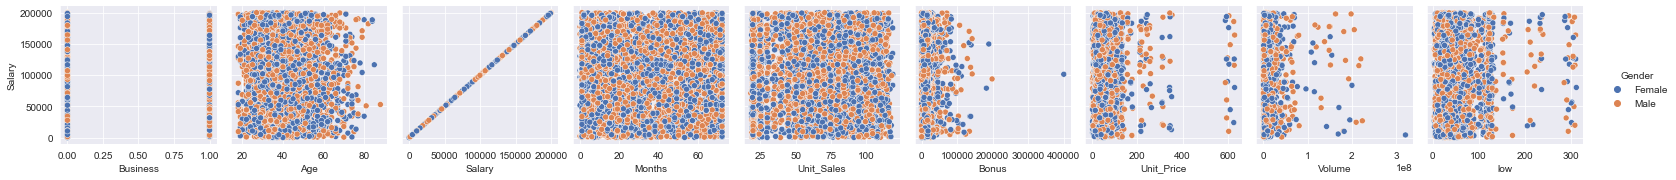

In [12]:
# #Analyzing how the salary is distributed and check the relationship for all the features with Salary.

sns.set({'figure.figsize':(15.7,8.27)})
sns.pairplot(data=df, y_vars='Salary',hue='Gender', diag_kind=None)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

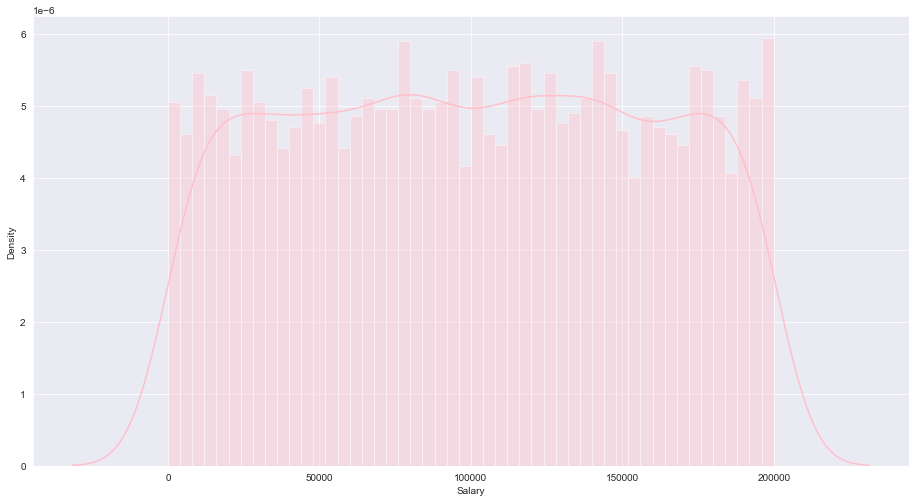

In [13]:
sns.distplot(df['Salary'],bins=50,color = "pink")


In [14]:
minSal= df['Salary'].quantile(0.05)
minSal

9874.854

In [15]:
maxSal= df['Salary'].quantile(0.95)
maxSal

191048.728

array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

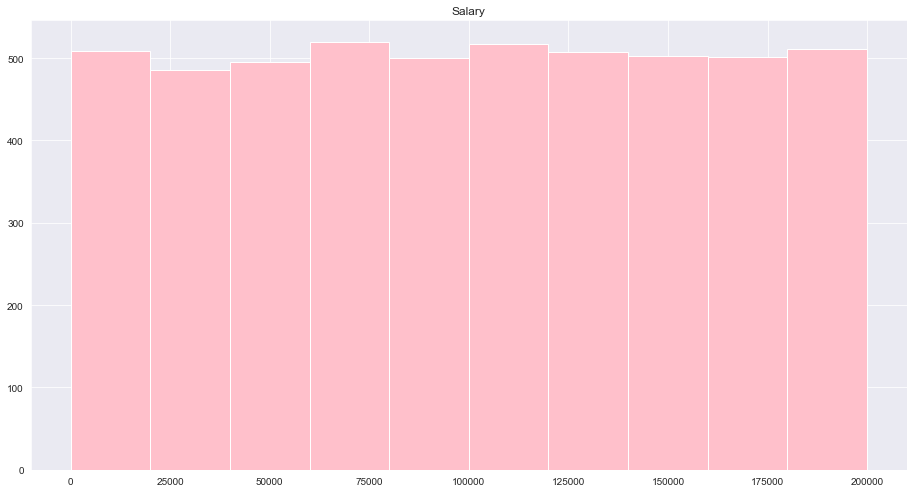

In [16]:
df.hist(column='Salary',color = "pink")


<AxesSubplot:>

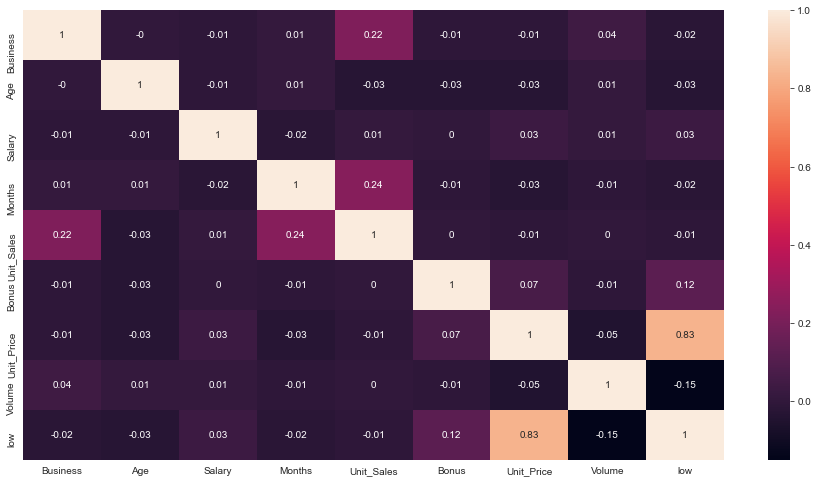

In [17]:
corrMatrix= df.corr().round(2)
sns.heatmap(data=corrMatrix,annot=True)


<AxesSubplot:>

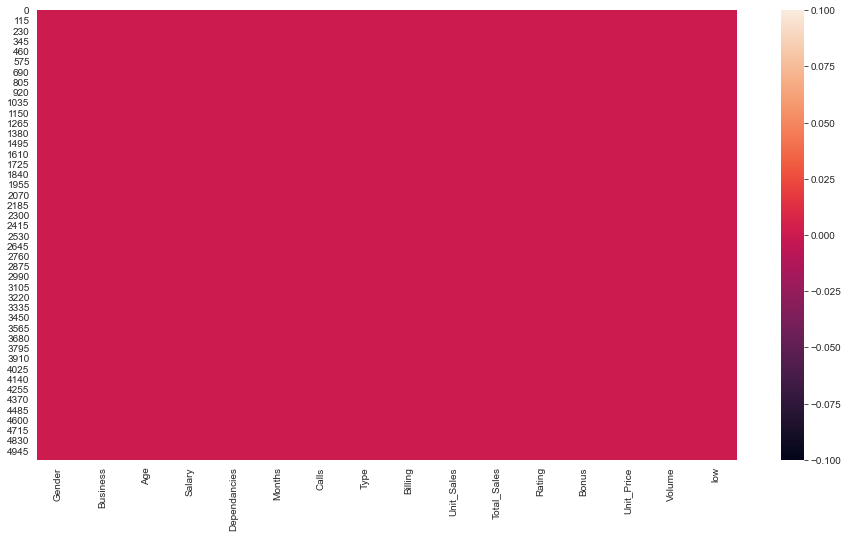

In [18]:
# find the null values in the columns

sns.heatmap(df.isnull())



# Check for Outliers

<AxesSubplot:>

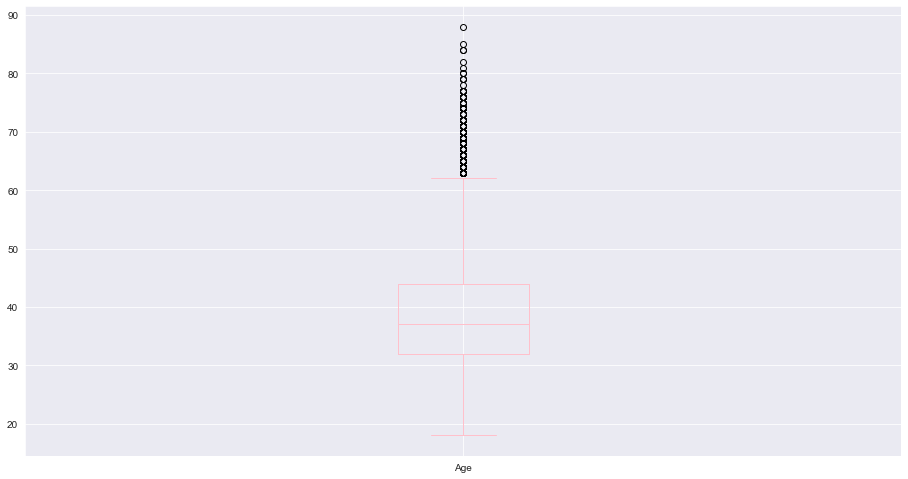

In [19]:
df.boxplot("Age",color = "pink")
# Outliers found

In [20]:
q1Age = df['Age'].describe()[4]
q3Age = df['Age'].describe()[6]
IQRAge = q3Age - q1Age
IQRAge

12.0

In [21]:
#upperwhisker
upperwhiskerAge = (q3Age + (1.5*IQRAge)).astype(int)
upperwhiskerAge


62

In [22]:
#lowerwhisker
lowerwhiskerAge = (q1Age - (1.5*IQRAge)).astype(int)
lowerwhiskerAge

14

In [23]:
# identify all the outliers in age column less than lowerwhisker value
outAgeL = len (df[df['Age'] < lowerwhiskerAge]['Age'])
outAgeL

0

In [24]:
# identify all the outliers in age column more than upperwhisker value
df[df['Age'] > upperwhiskerAge]['Age']

58      66
85      75
104     65
158     73
181     65
        ..
4931    81
4966    64
5000    68
5020    68
5038    63
Name: Age, Length: 183, dtype: int64

In [25]:
outAge = len (df[df['Age'] > upperwhiskerAge]['Age'])
outAge

183

In [26]:
percentAge = round((outAge/df.shape[0])*100 , 2)
percentAge
#If percent is more than 0.3% we need to handle the outlier .
# It's 3.62 % so we need to handle the outlier.

3.62

In [27]:
#Replace the outliers with the upperwhisker 
df['Age'] = np.where(df['Age'] > upperwhiskerAge , upperwhiskerAge , df['Age'] )

<AxesSubplot:>

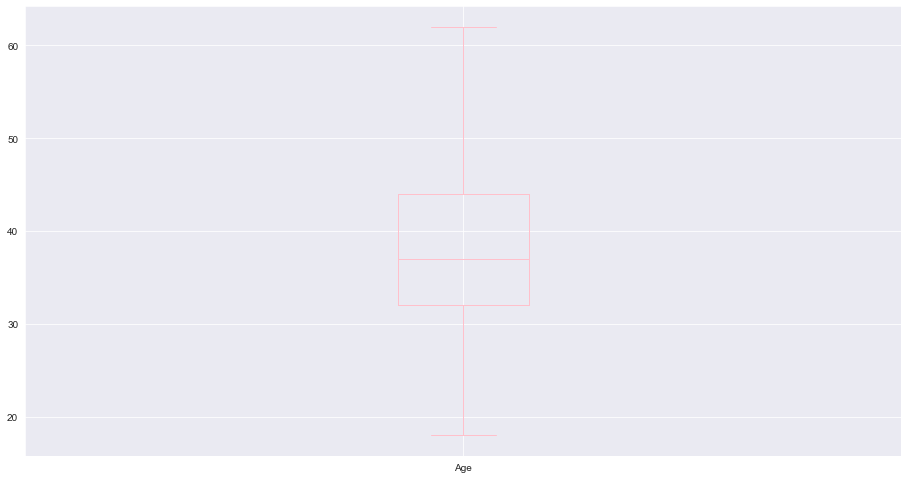

In [28]:
df.boxplot("Age",color = "pink")


<AxesSubplot:>

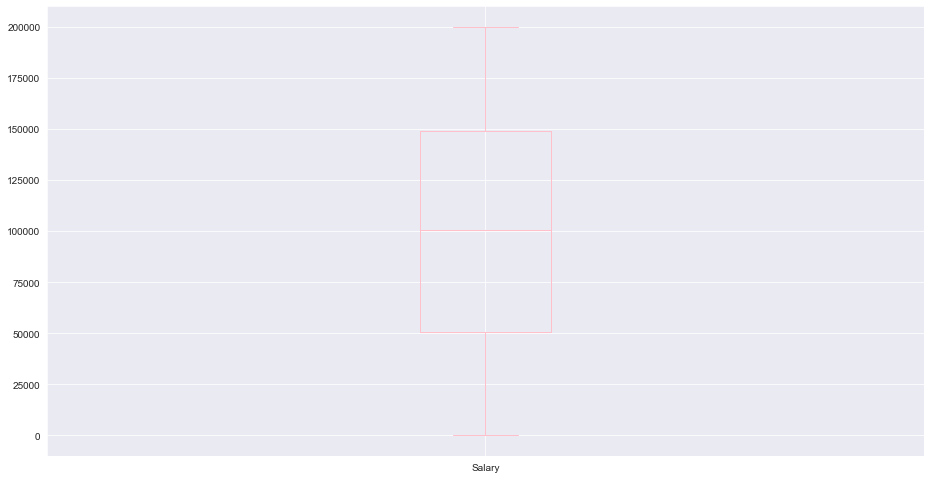

In [29]:

#Plotting the boxplot for the Salary Column
df.boxplot('Salary',color = "pink")
# No outlier found

In [30]:
#Month

<AxesSubplot:>

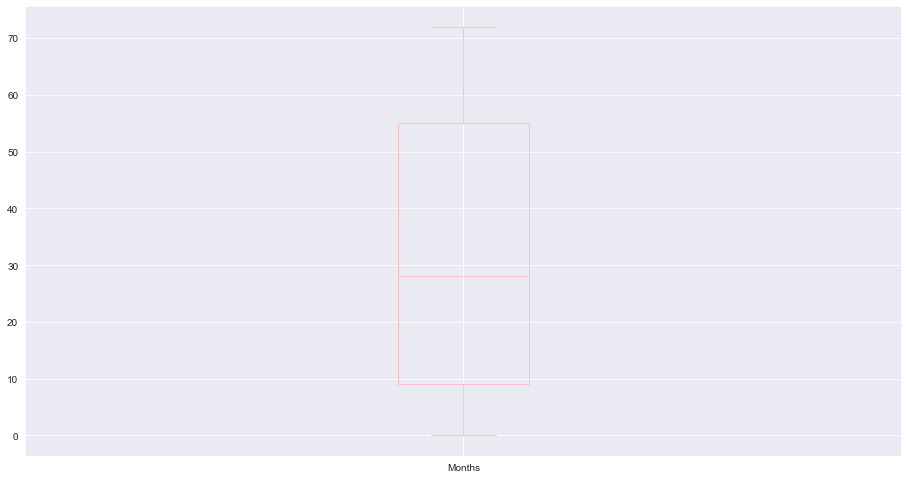

In [31]:
df.boxplot("Months",color = "pink")
#No outlier found

<AxesSubplot:>

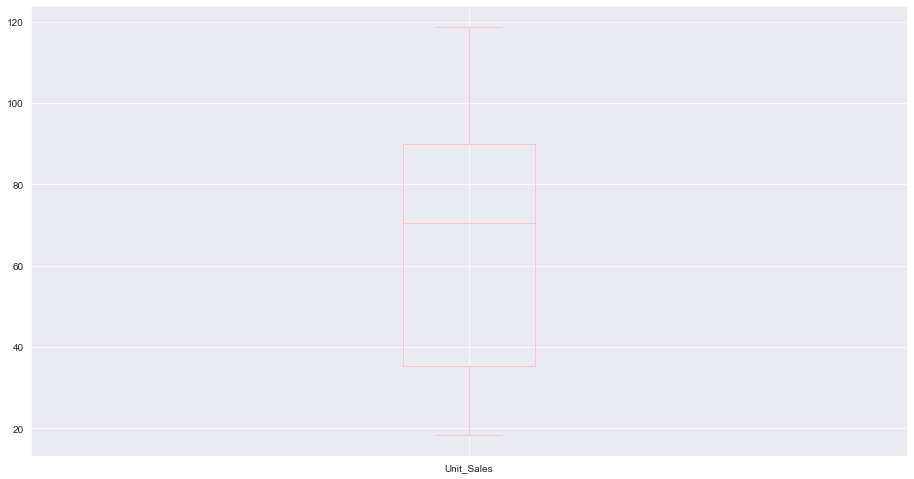

In [32]:
df.boxplot("Unit_Sales",color = "pink")
# No outlier found

<AxesSubplot:>

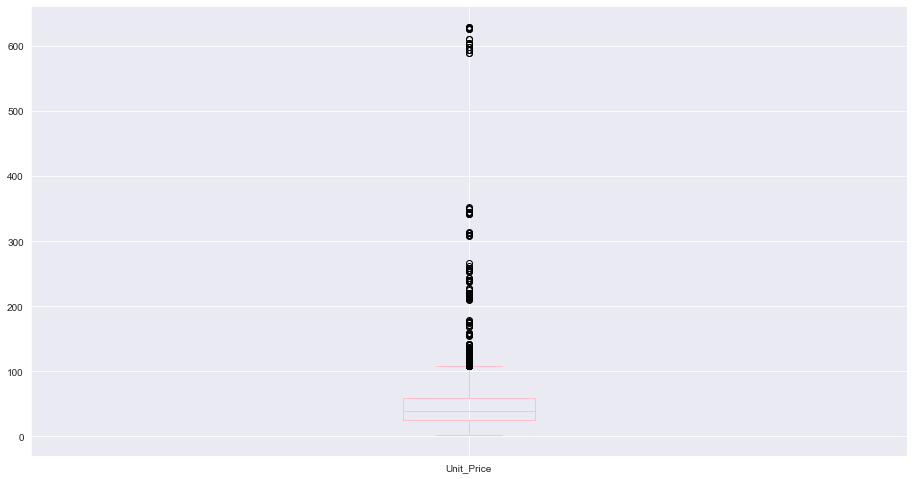

In [33]:
#Plotting the boxplot for the Unit_Price Column
df.boxplot('Unit_Price',color = "pink")

In [34]:
q1UnitPrice = df['Unit_Price'].describe()[4]
q3UnitPrice = df['Unit_Price'].describe()[6]
IQRUnitPrice = q3UnitPrice - q1UnitPrice
IQRUnitPrice

32.83

In [35]:
# calculate upperwhisker
upperwhiskerUnitPrice = (q3UnitPrice + (1.5*IQRUnitPrice)).astype(int)
upperwhiskerUnitPrice

107

In [36]:
# calculate lowerwhisker
lowerwhiskerUnitPrice = (q1UnitPrice - (1.5*IQRUnitPrice)).astype(int)
lowerwhiskerUnitPrice

-23

In [37]:
outUnitPriceL = len (df[df['Unit_Price'] < lowerwhiskerUnitPrice]['Unit_Price'])
outUnitPriceL

0

In [38]:
df[df['Unit_Price'] > upperwhiskerUnitPrice]['Unit_Price']

outUnitPrice = len (df[df['Unit_Price'] > upperwhiskerUnitPrice]['Unit_Price'])

percentUnitPrice = round((outUnitPrice/df.shape[0])*100 , 2)
percentUnitPrice

df['Unit_Price'] = np.where(df['Unit_Price'] > upperwhiskerUnitPrice , upperwhiskerUnitPrice , df['Unit_Price'] )

<AxesSubplot:>

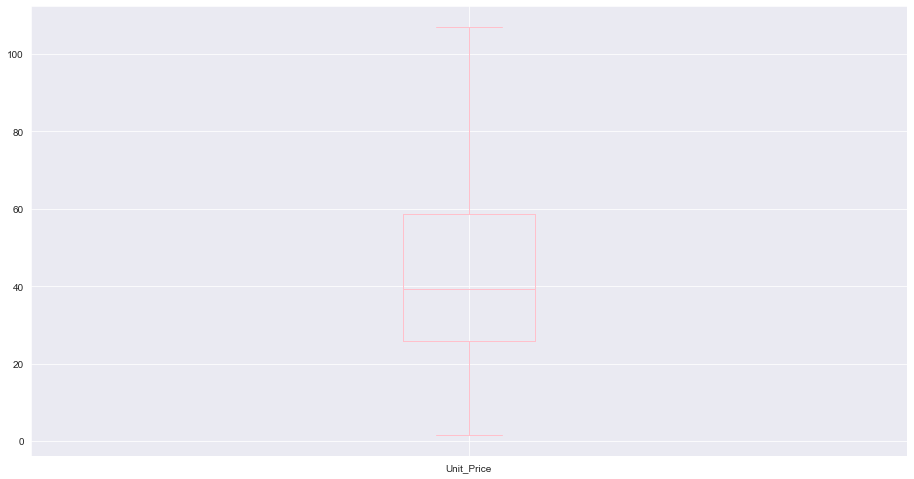

In [39]:
df.boxplot("Unit_Price",color = "pink")

<AxesSubplot:>

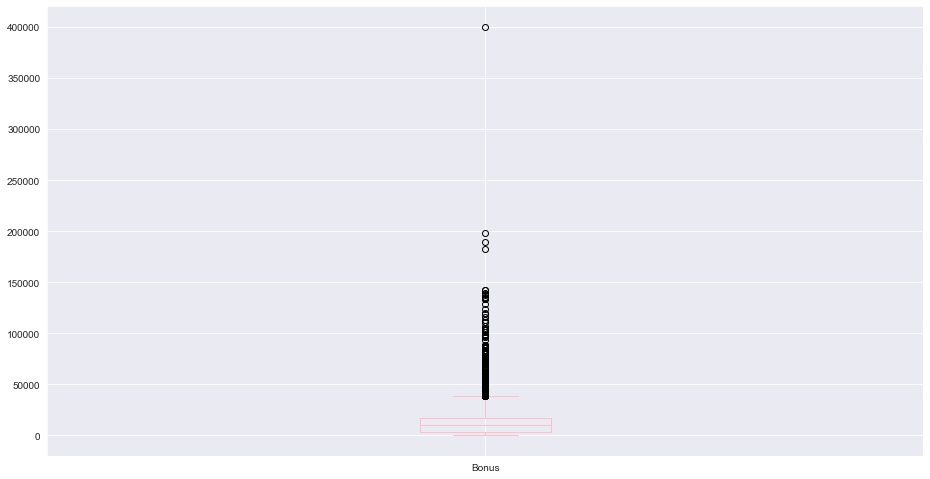

In [40]:
df.boxplot("Bonus",color = "pink")
# Outlier found

In [41]:
q1Bonus = df['Bonus'].describe()[4]
q3Bonus = df['Bonus'].describe()[6]
IQRBonus = q3Bonus - q1Bonus
IQRBonus

14105.03

In [42]:
# calculate upperwhisker
upperwhiskerBonus = (q3Bonus + (1.5*IQRBonus)).astype(int)
upperwhiskerBonus

38334

In [43]:
# calculate lowerwhisker
lowerwhiskerBonus = (q1Bonus - (1.5*IQRBonus)).astype(int)
lowerwhiskerBonus

-18085

In [44]:
outBonusL = len (df[df['Bonus'] < lowerwhiskerBonus]['Bonus'])
outBonusL

0

In [45]:
# identify all the outliers
df[df['Bonus'] > upperwhiskerAge]['Bonus']

0       400184.25
1       137811.38
2        16452.60
3       198306.90
4       182234.59
          ...    
5044      4773.17
5045     17063.77
5046     17959.69
5047      6462.36
5048     10676.41
Name: Bonus, Length: 4267, dtype: float64

In [46]:
outBonus = len (df[df['Bonus'] > upperwhiskerAge]['Bonus'])
outBonus

4267

In [47]:
#If percent is more than 0.3% we need to handle the outlier
percentBonus = round((outBonus/df.shape[0])*100 , 2)
percentBonus
# Inference :  If percent is more than 0.3% we need to handle the outlier . In this case its 84.51 % so we have to handle the outlier

84.51

In [48]:
df['Bonus'] = np.where(df['Bonus'] > upperwhiskerBonus , upperwhiskerBonus , df['Bonus'] )

<AxesSubplot:>

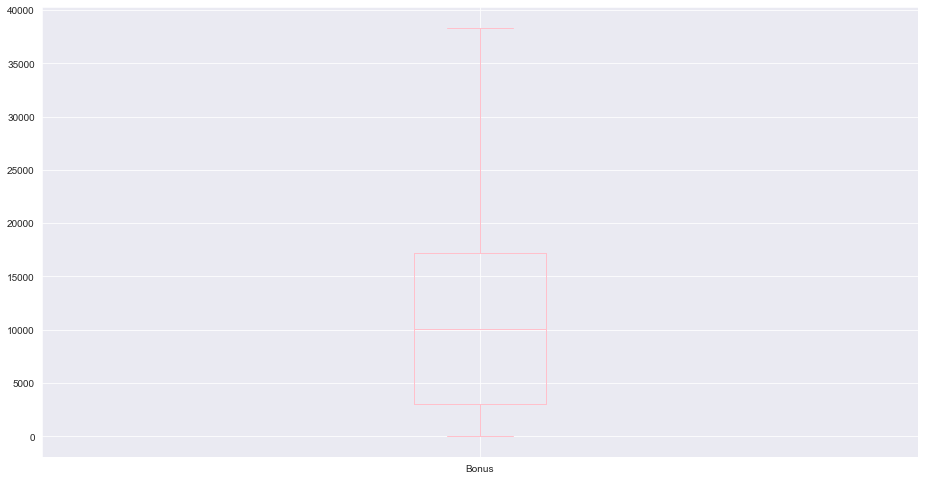

In [49]:
df.boxplot("Bonus",color = "pink")


KeyError: "None of [Index(['BasePay'], dtype='object')] are in the [columns]"

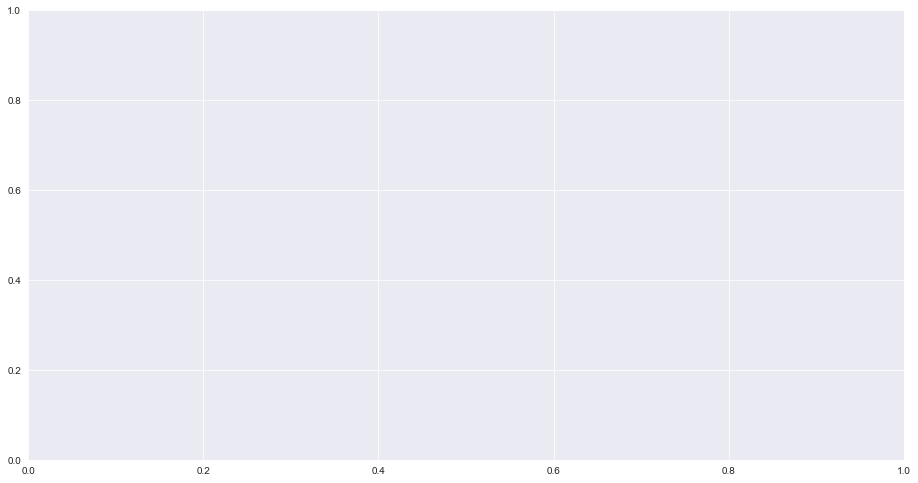

In [51]:
df.boxplot("BasePay",color = "pink")
#Inference: Outlier found

<AxesSubplot:>

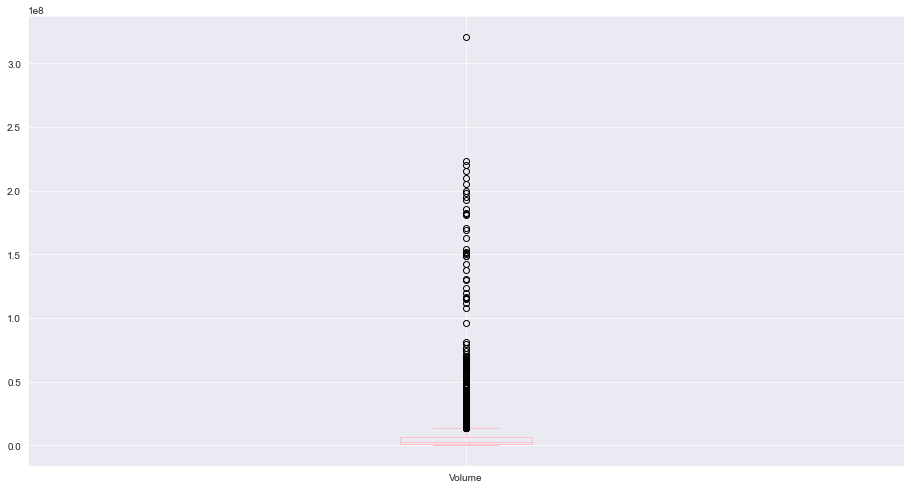

In [52]:
df.boxplot("Volume",color = "pink")

In [53]:
q1_Volume = df['Volume'].describe()[4]
q3_Volume = df['Volume'].describe()[6]
IQR_Volume = q3_Volume - q1_Volume
IQR_Volume

4923400.0

In [54]:
# calculate upperwhisker
upperwhisker_Volume = (q3_Volume + (1.5*IQR_Volume)).astype(int)
upperwhisker_Volume

13590200

In [55]:
# calculate lowerwhisker
lowerwhisker_Volume = (q1_Volume - (1.5*IQR_Volume)).astype(int)
lowerwhisker_Volume

-6103400

In [56]:
out_VolumeL = len (df[df['Volume'] < lowerwhisker_Volume]['Volume'])
out_VolumeL

0

In [57]:
# identify all the outliers in age column
df[df['Volume'] > upperwhisker_Volume]['Volume']


out_Volume = len (df[df['Volume'] > upperwhisker_Volume]['Volume'])
#out_Unit_Price


#If percent is more than 0.3% we need to handle the outlier
percent_Volume = round((out_Volume/df.shape[0])*100 , 2)
percent_Volume
# Inference :  If percent is more than 0.3% we need to handle the outlier . 
df['Volume'] = np.where(df['Volume'] > upperwhisker_Volume , upperwhisker_Volume, df['Volume'] )

<AxesSubplot:>

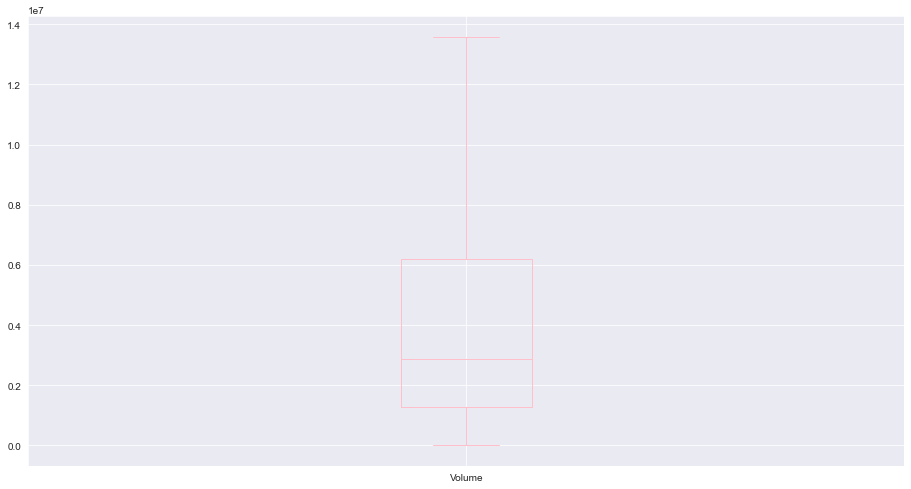

In [58]:
df.boxplot("Volume",color = "pink")

KeyError: "None of [Index(['openingbalance'], dtype='object')] are in the [columns]"

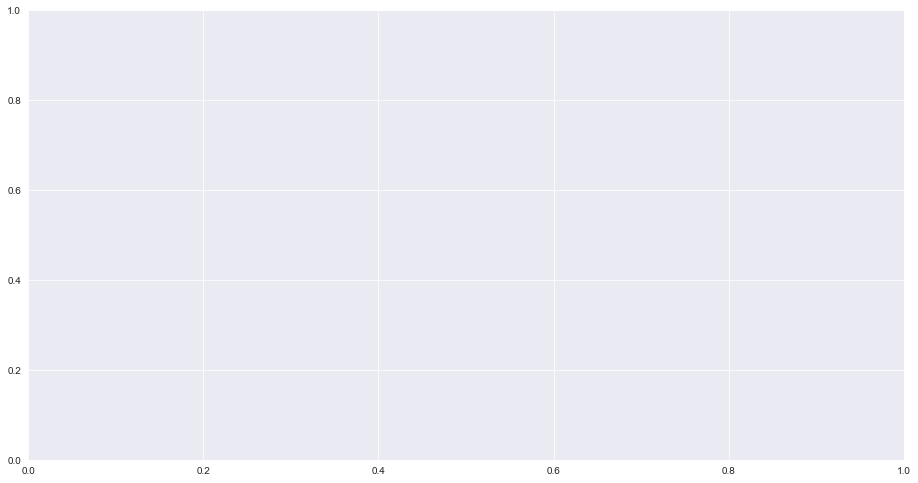

In [59]:
df.boxplot("openingbalance")

In [60]:
# Convert the "Gender" column into a categorical data and drop the female column as with Male column  . 

gender = pd.get_dummies(df['Gender'], drop_first=True)
gender.head(5)

,Male
0,0
1,1
2,1
3,1
4,0


In [61]:
# Convert the "Type" column into a categorical data 
# drop the month to month column as with One year and Two year column

Type = pd.get_dummies(df['Type'], drop_first=True)
Type.head(5)

,One year,Two year
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [62]:
df.head()

,Gender,Business,Age,Salary,Dependancies,Months,Calls,Type,Billing,Unit_Sales,Total_Sales,Rating,Bonus,Unit_Price,Volume,low
0,Female,0,42,101348.88,No,1,No,Month-to-month,Yes,29.85,29.85,No,38334.0,107.0,2163600,122.309998
1,Male,0,41,112542.58,No,34,Yes,One year,No,56.95,1889.5,No,38334.0,107.0,2386400,119.940002
2,Male,0,42,113931.57,No,2,Yes,Month-to-month,Yes,53.85,108.15,Yes,16452.6,107.0,2489500,114.930000
3,Male,0,39,93826.63,No,45,No,One year,No,42.30,1840.75,No,38334.0,107.0,2006300,113.500000
4,Female,0,43,79084.10,No,2,Yes,Month-to-month,Yes,70.70,151.65,Yes,38334.0,107.0,1408600,114.089996


In [63]:
df.Calls.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True )
df.Billing.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True )
df.Rating.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True )
df.Dependancies.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True )


In [64]:
df.head()

,Gender,Business,Age,Salary,Dependancies,Months,Calls,Type,Billing,Unit_Sales,Total_Sales,Rating,Bonus,Unit_Price,Volume,low
0,Female,0,42,101348.88,0,1,0,Month-to-month,1,29.85,29.85,0,38334.0,107.0,2163600,122.309998
1,Male,0,41,112542.58,0,34,1,One year,0,56.95,1889.5,0,38334.0,107.0,2386400,119.940002
2,Male,0,42,113931.57,0,2,1,Month-to-month,1,53.85,108.15,1,16452.6,107.0,2489500,114.930000
3,Male,0,39,93826.63,0,45,0,One year,0,42.30,1840.75,0,38334.0,107.0,2006300,113.500000
4,Female,0,43,79084.10,0,2,1,Month-to-month,1,70.70,151.65,1,38334.0,107.0,1408600,114.089996


In [65]:

df2 = pd.concat([df,gender,Type],axis=1)
df2.head(5)

,Gender,Business,Age,Salary,Dependancies,Months,Calls,Type,Billing,Unit_Sales,Total_Sales,Rating,Bonus,Unit_Price,Volume,low,Male,One year,Two year
0,Female,0,42,101348.88,0,1,0,Month-to-month,1,29.85,29.85,0,38334.0,107.0,2163600,122.309998,0,0,0
1,Male,0,41,112542.58,0,34,1,One year,0,56.95,1889.5,0,38334.0,107.0,2386400,119.940002,1,1,0
2,Male,0,42,113931.57,0,2,1,Month-to-month,1,53.85,108.15,1,16452.6,107.0,2489500,114.930000,1,0,0
3,Male,0,39,93826.63,0,45,0,One year,0,42.30,1840.75,0,38334.0,107.0,2006300,113.500000,1,1,0
4,Female,0,43,79084.10,0,2,1,Month-to-month,1,70.70,151.65,1,38334.0,107.0,1408600,114.089996,0,0,0


In [66]:
#Drop the old columns of Gender and Type - Text based  
df2.drop(['Gender','Type'], axis=1 , inplace=True)

In [67]:
df2.head()

,Business,Age,Salary,Dependancies,Months,Calls,Billing,Unit_Sales,Total_Sales,Rating,Bonus,Unit_Price,Volume,low,Male,One year,Two year
0,0,42,101348.88,0,1,0,1,29.85,29.85,0,38334.0,107.0,2163600,122.309998,0,0,0
1,0,41,112542.58,0,34,1,0,56.95,1889.5,0,38334.0,107.0,2386400,119.940002,1,1,0
2,0,42,113931.57,0,2,1,1,53.85,108.15,1,16452.6,107.0,2489500,114.930000,1,0,0
3,0,39,93826.63,0,45,0,0,42.30,1840.75,0,38334.0,107.0,2006300,113.500000,1,1,0
4,0,43,79084.10,0,2,1,1,70.70,151.65,1,38334.0,107.0,1408600,114.089996,0,0,0


<AxesSubplot:xlabel='Rating', ylabel='Salary'>

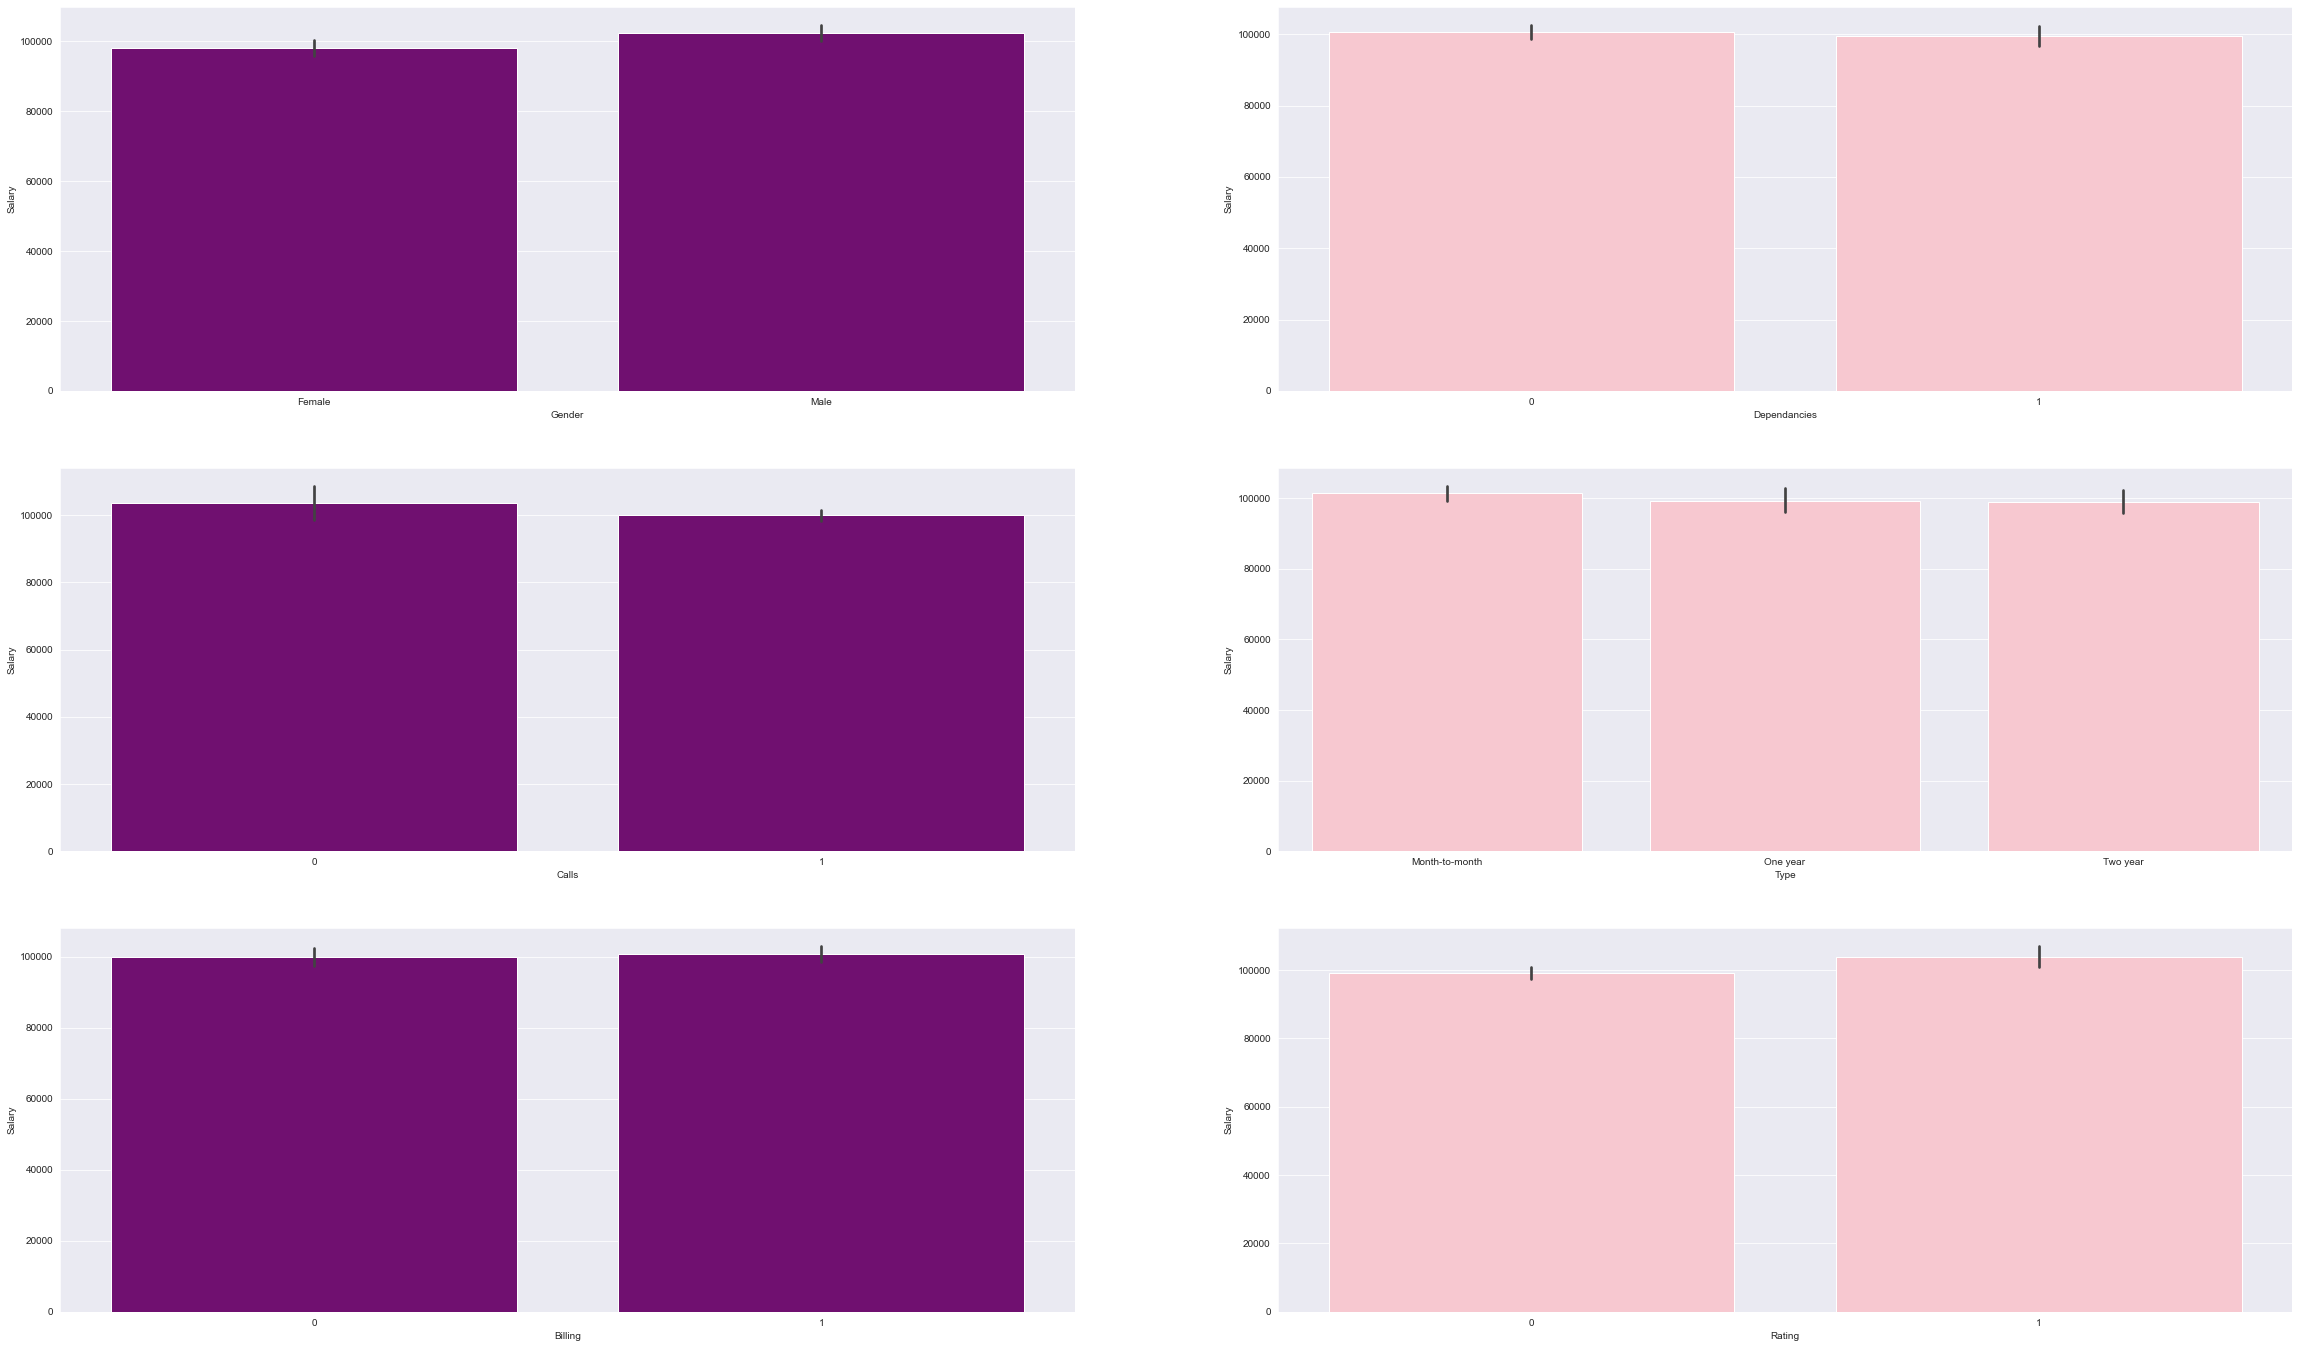

In [68]:
fig, axarr = plt.subplots(3, 2,figsize=(40, 24))
sns.barplot(x='Gender', y = 'Salary',data = df, ax=axarr[0][0],color = "purple")
sns.barplot(x='Dependancies', y = 'Salary',data = df, ax=axarr[0][1],color = "pink")
sns.barplot(x='Calls', y = 'Salary',data = df, ax=axarr[1][0],color = "purple")
sns.barplot(x='Type', y = 'Salary',data = df, ax=axarr[1][1],color = "pink")
sns.barplot(x='Billing', y = 'Salary',data = df, ax=axarr[2][0],color = "purple")
sns.barplot(y='Salary',x='Rating',data = df, ax=axarr[2][1],color = "pink")

<AxesSubplot:xlabel='Business', ylabel='count'>

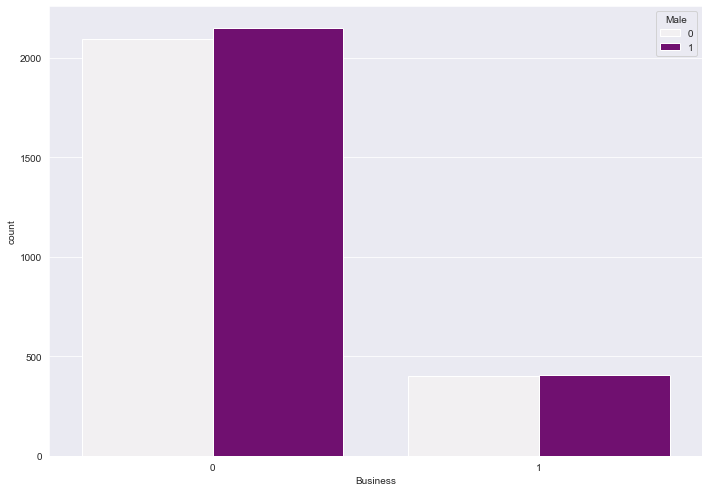

In [69]:
sns.set({'figure.figsize':(11.7,8.27)})

sns.countplot(x="Business", hue="Male", data=df2,color = "purple")



<AxesSubplot:xlabel='Male', ylabel='Age'>

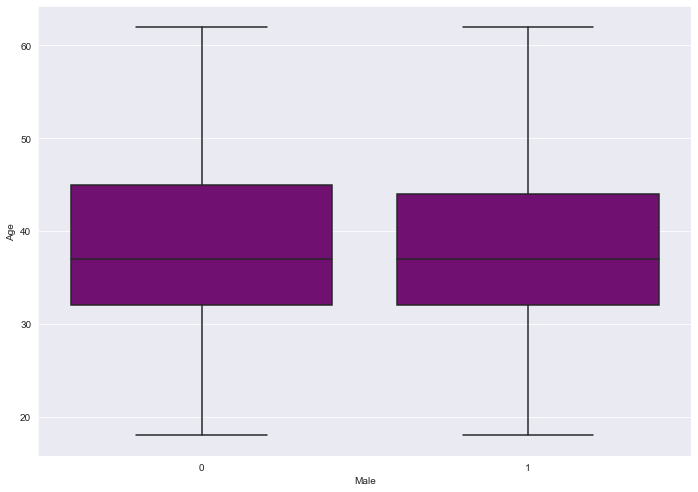

In [70]:
# check the outliers
sns.boxplot(x="Male", y="Age", data= df2, color = "purple")
# Most of the employees are between  32 to 45 years 

<AxesSubplot:ylabel='Frequency'>

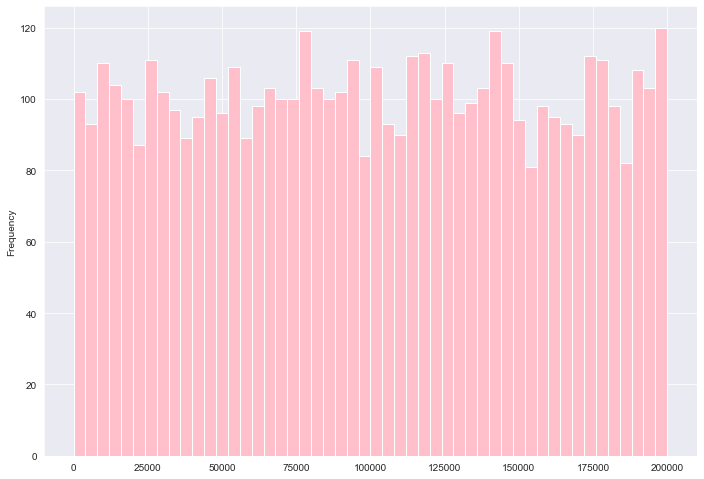

In [71]:
#  Plot a graph for salary
df2["Salary"].plot.hist(bins=50,color = "pink")



<AxesSubplot:ylabel='Frequency'>

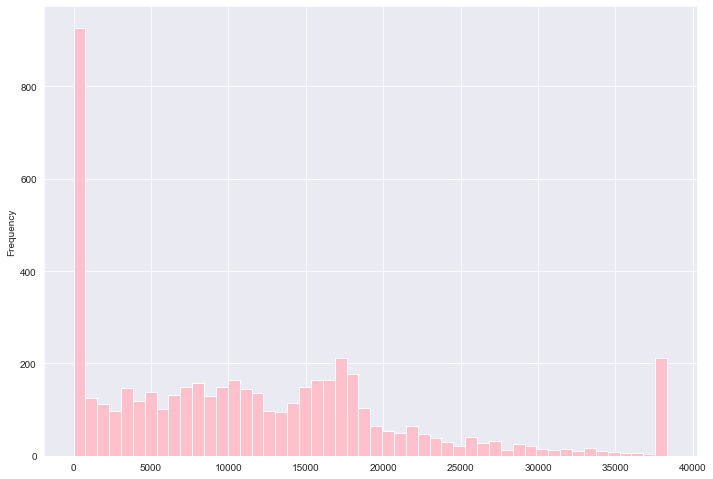

In [72]:
#  Plot a graph for bonus
df2["Bonus"].plot.hist(bins=50,color = "pink")



In [73]:
#  Plot a graph for basepay
df2["BasePay"].plot.hist(bins=50,color = "pink")



KeyError: 'BasePay'

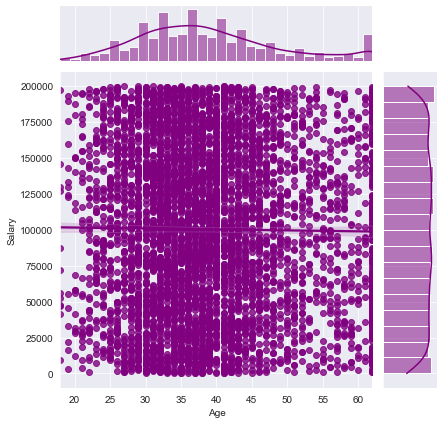

In [74]:
sns.jointplot(y='Salary',x = 'Age', kind = "reg", data = df,  ax=axarr[0][0],color="purple")

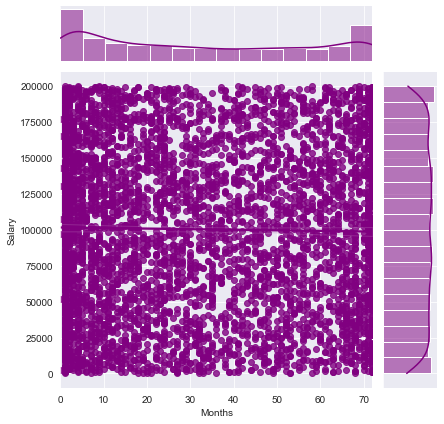

In [75]:
sns.jointplot(y='Salary',x = 'Months', kind = "reg", data = df, ax=axarr[0][1],color="purple")

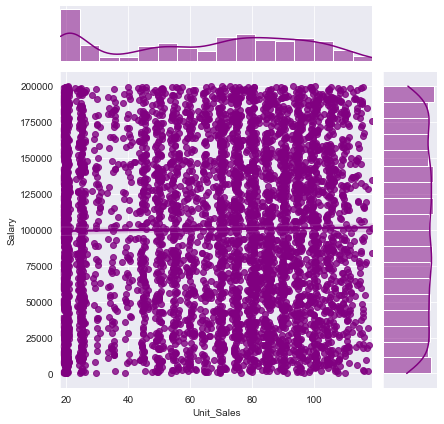

In [76]:
sns.jointplot(y='Salary',x = 'Unit_Sales', kind = "reg", data = df, ax=axarr[1][0],color="purple")

In [77]:

sns.jointplot(y='Salary',x = 'Total_Sales', kind = "reg", data = df,  ax=axarr[1][1],color="purple")

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

Error in callback <function flush_figures at 0x7ff31a406820> (for post_execute):


KeyboardInterrupt: 

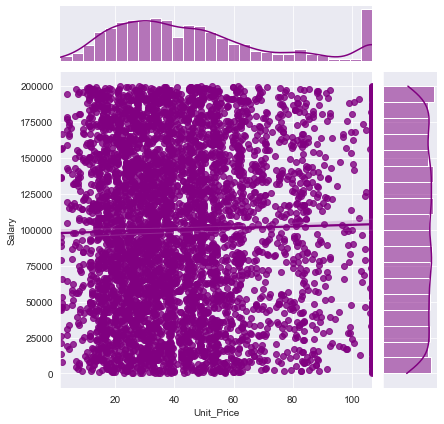

In [78]:
sns.jointplot(y='Salary',x = 'Unit_Price', kind = "reg", data = df,  ax=axarr[2][0],color="purple")

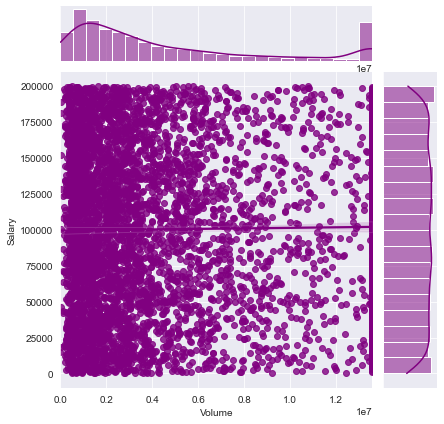

In [79]:
sns.jointplot(y='Salary',x = 'Volume', kind = "reg", data = df,  ax=axarr[2][1],color="purple")

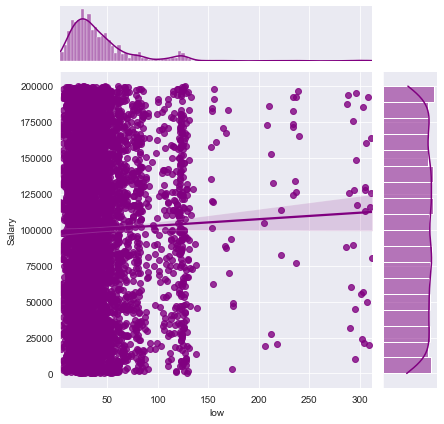

In [80]:
sns.jointplot(y='Salary',x = 'low', kind = "reg", data = df,color="purple")

# Feature Scaling - Normalization

In [81]:
# Convert the datatype
df2["Total_Sales"] = pd.to_numeric(df2["Total_Sales"], errors='coerce')

In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Business      5049 non-null   int64  
 1   Age           5049 non-null   int64  
 2   Salary        5049 non-null   float64
 3   Dependancies  5049 non-null   int64  
 4   Months        5049 non-null   int64  
 5   Calls         5049 non-null   int64  
 6   Billing       5049 non-null   int64  
 7   Unit_Sales    5049 non-null   float64
 8   Total_Sales   5041 non-null   float64
 9   Rating        5049 non-null   int64  
 10  Bonus         5049 non-null   float64
 11  Unit_Price    5049 non-null   float64
 12  Volume        5049 non-null   int64  
 13  low           5049 non-null   float64
 14  Male          5049 non-null   uint8  
 15  One year      5049 non-null   uint8  
 16  Two year      5049 non-null   uint8  
dtypes: float64(6), int64(8), uint8(3)
memory usage: 567.2 KB


In [83]:
#Check for null values 
df2.isnull().sum()

Business        0
Age             0
Salary          0
Dependancies    0
Months          0
Calls           0
Billing         0
Unit_Sales      0
Total_Sales     8
Rating          0
Bonus           0
Unit_Price      0
Volume          0
low             0
Male            0
One year        0
Two year        0
dtype: int64

In [84]:
#Replace the null values 
df2["Total_Sales"].fillna(df2["Total_Sales"].mean(), inplace=True)

In [85]:
# Check if null values again
df2.isnull().sum()

Business        0
Age             0
Salary          0
Dependancies    0
Months          0
Calls           0
Billing         0
Unit_Sales      0
Total_Sales     0
Rating          0
Bonus           0
Unit_Price      0
Volume          0
low             0
Male            0
One year        0
Two year        0
dtype: int64

In [86]:
# Normalisation - Import Scaling library 
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()

In [87]:
#Normalise the dataset  - (range of all values between 0-1)

#set the rounding for the dataset to 4 decimal places
pd.options.display.float_format = "{:,.4f}".format

dfs=scale.fit_transform(df2)
df2= pd.DataFrame(dfs , columns= ['Business' , 'Age'  ,'Salary' ,'Dependancies','Months','Calls' ,'Billing' ,'Unit_Sales'  ,'Total_Sales' ,'Rating','Bonus','BasePay' ,'Unit_Price' ,'Volume' ,'openingbalance' ,'Male' , 'One year' ,'Two year' ])


ValueError: Shape of passed values is (5049, 17), indices imply (5049, 18)

In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Business      5049 non-null   int64  
 1   Age           5049 non-null   int64  
 2   Salary        5049 non-null   float64
 3   Dependancies  5049 non-null   int64  
 4   Months        5049 non-null   int64  
 5   Calls         5049 non-null   int64  
 6   Billing       5049 non-null   int64  
 7   Unit_Sales    5049 non-null   float64
 8   Total_Sales   5049 non-null   float64
 9   Rating        5049 non-null   int64  
 10  Bonus         5049 non-null   float64
 11  Unit_Price    5049 non-null   float64
 12  Volume        5049 non-null   int64  
 13  low           5049 non-null   float64
 14  Male          5049 non-null   uint8  
 15  One year      5049 non-null   uint8  
 16  Two year      5049 non-null   uint8  
dtypes: float64(6), int64(8), uint8(3)
memory usage: 567.2 KB


In [89]:
df2

,Business,Age,Salary,Dependancies,Months,Calls,Billing,Unit_Sales,Total_Sales,Rating,Bonus,Unit_Price,Volume,low,Male,One year,Two year
0,0,42,"101,348.8800",0,1,0,1,29.8500,29.8500,0,"38,334.0000",107.0000,2163600,122.3100,0,0,0
1,0,41,"112,542.5800",0,34,1,0,56.9500,"1,889.5000",0,"38,334.0000",107.0000,2386400,119.9400,1,1,0
2,0,42,"113,931.5700",0,2,1,1,53.8500,108.1500,1,"16,452.6000",107.0000,2489500,114.9300,1,0,0
3,0,39,"93,826.6300",0,45,0,0,42.3000,"1,840.7500",0,"38,334.0000",107.0000,2006300,113.5000,1,1,0
4,0,43,"79,084.1000",0,2,1,1,70.7000,151.6500,1,"38,334.0000",107.0000,1408600,114.0900,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,0,30,"140,650.1900",0,22,1,1,104.6000,"2,180.5500",0,"4,773.1700",45.2000,583300,44.0800,1,0,0
5045,0,29,"4,733.9400",0,35,1,0,80.0500,"2,835.9000",0,"17,063.7700",39.4400,1536500,38.7700,0,0,0
5046,0,25,"10,579.7200",0,1,1,0,45.1500,45.1500,0,"17,959.6900",13.2900,9836500,12.7900,0,0,0
5047,0,26,"179,655.8700",0,39,1,1,73.1500,"2,730.8500",0,"6,462.3600",34.8800,5975500,32.2127,1,0,0


#  ML model 

In [93]:
# import necessary modules
import warnings
warnings.filterwarnings('ignore')
import time 
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor



XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [94]:
# load the  dataset
#set the rounding for the dataset to 4 decimal places
pd.options.display.float_format = "{:,.4f}".format

X1= df2.drop("Salary", axis=1)
Y1= df2["Salary"]

In [95]:
X1

,Business,Age,Dependancies,Months,Calls,Billing,Unit_Sales,Total_Sales,Rating,Bonus,Unit_Price,Volume,low,Male,One year,Two year
0,0,42,0,1,0,1,29.8500,29.8500,0,"38,334.0000",107.0000,2163600,122.3100,0,0,0
1,0,41,0,34,1,0,56.9500,"1,889.5000",0,"38,334.0000",107.0000,2386400,119.9400,1,1,0
2,0,42,0,2,1,1,53.8500,108.1500,1,"16,452.6000",107.0000,2489500,114.9300,1,0,0
3,0,39,0,45,0,0,42.3000,"1,840.7500",0,"38,334.0000",107.0000,2006300,113.5000,1,1,0
4,0,43,0,2,1,1,70.7000,151.6500,1,"38,334.0000",107.0000,1408600,114.0900,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,0,30,0,22,1,1,104.6000,"2,180.5500",0,"4,773.1700",45.2000,583300,44.0800,1,0,0
5045,0,29,0,35,1,0,80.0500,"2,835.9000",0,"17,063.7700",39.4400,1536500,38.7700,0,0,0
5046,0,25,0,1,1,0,45.1500,45.1500,0,"17,959.6900",13.2900,9836500,12.7900,0,0,0
5047,0,26,0,39,1,1,73.1500,"2,730.8500",0,"6,462.3600",34.8800,5975500,32.2127,1,0,0


In [96]:
Y1

0      101,348.8800
1      112,542.5800
2      113,931.5700
3       93,826.6300
4       79,084.1000
           ...     
5044   140,650.1900
5045     4,733.9400
5046    10,579.7200
5047   179,655.8700
5048    77,502.5600
Name: Salary, Length: 5049, dtype: float64

In [97]:
# split the dataset 
X_train1, X_test1, Y_train1, Y_test1 =train_test_split(X1,Y1,test_size=0.2,random_state = 0)
regr=LazyRegressor(verbose=0,predictions=True)
#regr= LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None, predictions=True)

NameError: name 'LazyRegressor' is not defined

In [ ]:
# fit and train the model 
start_time_2=time.time()
models_r,predictions_r=regr.fit(X_train1, X_test1, Y_train1, Y_test1)
end_time_2=time.time()

NameError: name 'regr' is not defined

In [ ]:
# to check which model did better on the  dataset
models_r

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,-0.0138,0.0032,0.2855,0.2269
LassoLarsCV,-0.0179,-0.0007,0.2861,0.0740
LarsCV,-0.0179,-0.0007,0.2861,0.0710
ElasticNetCV,-0.0180,-0.0009,0.2861,0.1319
LassoCV,-0.0180,-0.0009,0.2861,0.1419
Lars,-0.0181,-0.0009,0.2861,0.0320
PoissonRegressor,-0.0181,-0.0010,0.2861,0.0189
BayesianRidge,-0.0183,-0.0011,0.2861,0.0280
TweedieRegressor,-0.0184,-0.0013,0.2862,0.0193


In [ ]:
# to check the predications for the models 
predictions_r

,AdaBoostRegressor,BaggingRegressor,BayesianRidge,DecisionTreeRegressor,DummyRegressor,ElasticNet,ElasticNetCV,ExtraTreeRegressor,ExtraTreesRegressor,GaussianProcessRegressor,...,RANSACRegressor,RandomForestRegressor,Ridge,RidgeCV,SGDRegressor,SVR,TransformedTargetRegressor,TweedieRegressor,XGBRegressor,LGBMRegressor
0,0.4973,0.6400,0.5020,0.8147,0.5038,0.5038,0.5042,0.2015,0.5510,0.5522,...,0.1414,0.5700,0.5035,0.5034,0.5245,0.5603,0.5035,0.5020,0.6609,0.6391
1,0.4901,0.5453,0.4848,0.3219,0.5038,0.5038,0.4879,0.1829,0.4420,0.4619,...,0.4028,0.4442,0.4622,0.4623,0.4635,0.4223,0.4622,0.4820,0.5077,0.4351
2,0.4951,0.4357,0.4824,0.2208,0.5038,0.5038,0.4866,0.3207,0.4230,0.0941,...,0.3722,0.4118,0.4474,0.4480,0.4914,0.4684,0.4474,0.4794,0.4154,0.5145
3,0.4973,0.4625,0.5038,0.7469,0.5038,0.5038,0.4940,0.7178,0.5869,0.6992,...,0.1107,0.5811,0.4941,0.4943,0.4995,0.5951,0.4940,0.5033,0.6085,0.5517
4,0.4972,0.3818,0.4944,0.7846,0.5038,0.5038,0.4873,0.9881,0.6532,0.6609,...,0.5064,0.5722,0.4885,0.4882,0.5168,0.6448,0.4885,0.4930,0.7407,0.6543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,0.5266,0.6594,0.5321,0.5704,0.5038,0.5038,0.5305,0.6294,0.5463,0.7048,...,-0.0481,0.5407,0.5582,0.5582,0.5560,0.6743,0.5582,0.5359,0.6002,0.5912
1006,0.4910,0.5121,0.4844,0.7992,0.5038,0.5038,0.4878,0.8815,0.5756,0.7481,...,0.8680,0.5692,0.4686,0.4687,0.4767,0.6361,0.4686,0.4820,0.5098,0.5331
1007,0.4910,0.2104,0.4936,0.3062,0.5038,0.5038,0.4869,0.0559,0.4422,0.5440,...,0.8368,0.4096,0.4980,0.4977,0.5315,0.3178,0.4981,0.4927,0.4236,0.4021
1008,0.4910,0.5632,0.5154,0.4080,0.5038,0.5038,0.5183,0.8015,0.6640,0.5609,...,-0.0523,0.5109,0.5239,0.5241,0.5474,0.5083,0.5239,0.5171,0.3586,0.5159


# Model 1: RandomForest ML Alogorithm 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error


In [ ]:
#x11= df2.drop("Total_Sales", axis=1)
#X1 = df2.drop("Salary", axis=1)
#Y1 = df2["Salary"]
#x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.20, random_state=0)

In [ ]:
Randomforestmodel= RandomForestRegressor()

In [ ]:
#Randomforestmodel.fit(x_train,y_train)

Randomforestmodel.fit(X_train1, Y_train1)

#Note: Using the same Train and Test set as used by Lazypredict to avoid any data  difference.

RandomForestRegressor()

In [ ]:
y_pred= Randomforestmodel.predict(X_test1)
y_pred

array([0.6312944 , 0.46693411, 0.47664132, ..., 0.39391683, 0.55315634,
       0.53344821])

In [ ]:
# Check the performance parameter
mse= mean_squared_error(Y_test1,y_pred)
rmse=np.sqrt(mse)
rmse

r2=r2_score(Y_test1,y_pred)

print("Model performance for testing set \n")
print("RMSE is {}" .format(rmse))
print ("R2 Score {}".format(r2))
print("\n")


#Inference : 
 #Lazypredict(RandomForest) RMSE :0.2907
 #RandomForest ML RMSE           :0.2911 
 #Both the values are almost similar 
    
 #Lazypredict(RandomForest) R2 :-0.0329
 #RandomForest ML R2           :-0.0363
 #Both the values are almost similar 
    


Model performance for testing set 

RMSE is 0.2911247310830165
R2 Score -0.0362543336735508


